In [24]:
__file__ = 'A1.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP4_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat
import scipy.constants as const
import scipy.fft as fft

In [25]:
with open('Data/Aufgabe_3.txt','r') as tf:
    data = np.genfromtxt(tf).T
with open('Res/cp-cal_res.txt','r') as tf:
    cal = np.genfromtxt(tf).T

data = f.channel_to_pos(data,cal)

von 4.255
bis 5.868

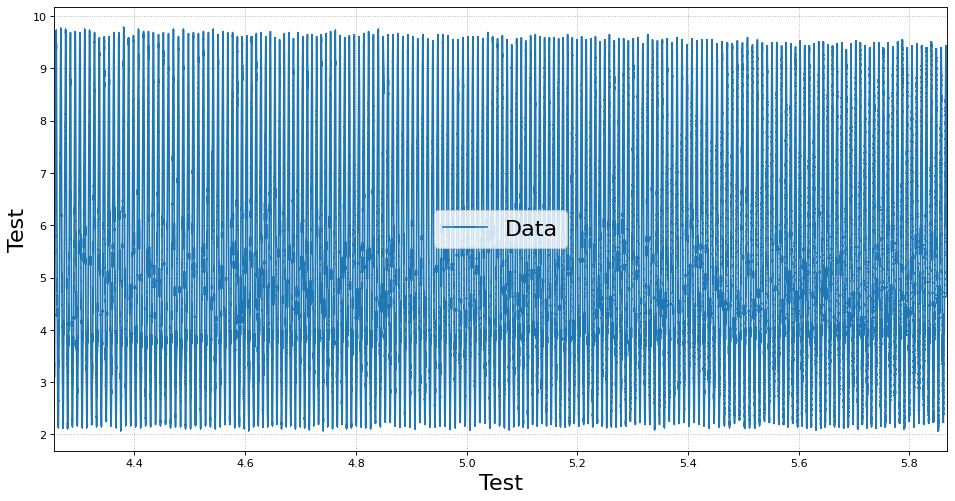

In [26]:
f.figsize(2)
plt.errorbar(data[0],data[1],xerr=data[2],label = 'Data')

f.form([4.255,5.868])
#f.form([4.4,5])

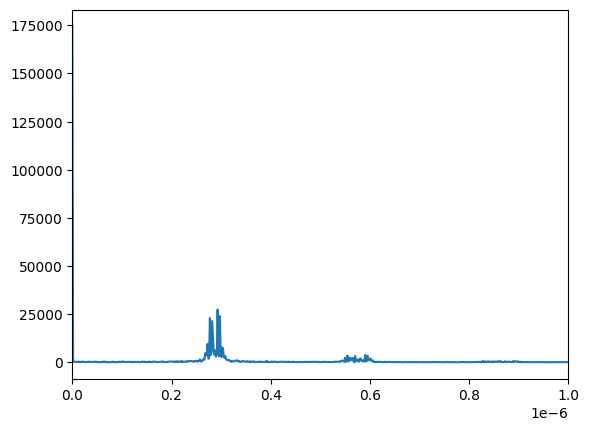

In [45]:
von,bis = f.pos(data[0],4.255),f.pos(data[0],5.86)

sr = (5.86-4.255)/(bis-von)
n = len(data[1][von:bis])
d = 1/sr



yf = fft.rfft(data[1][von:bis])
xs = fft.rfftfreq(n=n,d=d)

plt.xlim(0,1e-6)
plt.plot(xs,np.abs(yf))

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 617
    # data points      = 120
    # variables        = 3
    chi-square         = 1.5138e+09
    reduced chi-square = 12938221.3
    Akaike info crit   = 1968.04543
    Bayesian info crit = 1976.40790
    R-squared          = 0.39160670
[[Variables]]
    amplitude:  1.8635e-04 +/- 3245.72340 (1741775404.88%) (init = 0.0008298906)
    center:     2.8764e-07 +/- 2.9326e-09 (1.02%) (init = 2.874011e-07)
    sigma:      9.6574e-09 +/- 0.21799997 (2257336564.24%) (init = 1.012524e-08)
    fwhm:       2.2741e-08 +/- 0.51335068 (2257336559.60%) == '2.3548200*sigma'
    height:     7697.84798 +/- 3.9687e+10 (515561174.01%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 1.000


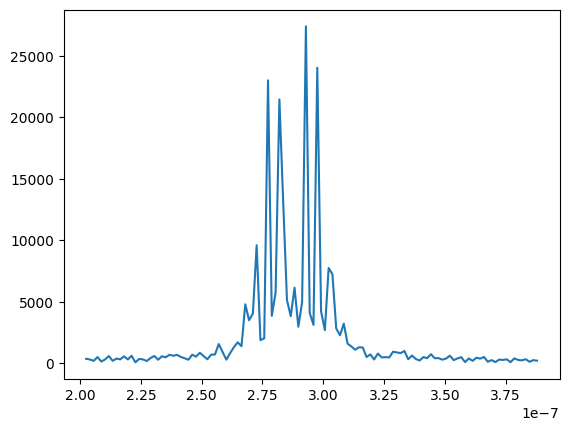

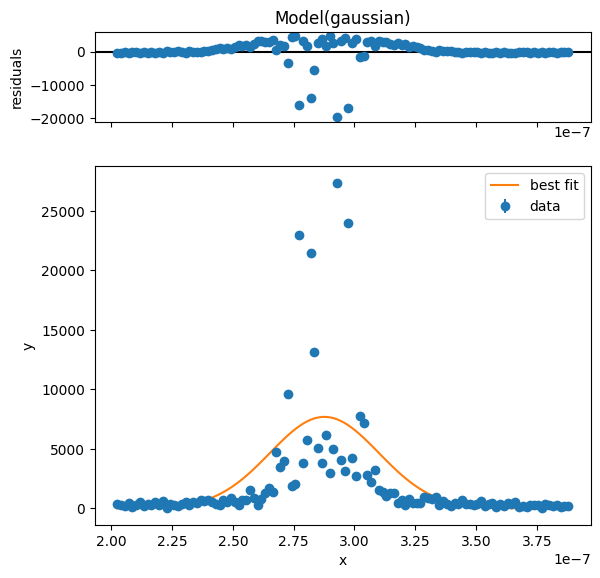

In [44]:
von,bis = 130,250
plt.plot(xs[von:bis],np.abs(yf)[von:bis])

yf=np.abs(yf)
fillerr = np.full(bis-von,1)

res = f.gausfit(yf[von:bis],xs[von:bis],fillerr)
res.plot()
print(res.fit_report())